**Appendix A: Import data and packages to Python. Create subset**

In [1]:
#import needed packages
import pandas as pd
import numpy as np 
import statistics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy
from scipy import stats
import statsmodels.api as statsmodels 
import seaborn as sns 
sns.set(color_codes=True)

#import data 
energydata_df = pd.read_csv("KAG_energydata_complete.csv") #import the data from csv file
energydata_df = energydata_df.dropna(subset = ['lights','appliances'])

lights = energydata_df['lights'] 
appliances = energydata_df['appliances']

#Convert the data into list for easier manipulation 
list_lights = list(lights)
list_appliances = list(appliances)

energydata_df.head(10) #shows the first 10 rows of the data 

,appliances,lights
0,60,30
1,60,30
2,50,30
3,50,40
4,60,40
5,50,40
6,60,50
7,60,50
8,60,40
9,70,40


**Appendix B: Descriptive statistics for the dataset**

In [6]:
# Descriptive statistics for the dataset 
# Build a function to calculate descriptive statistics (mean, mode, range, and standard deviation) based on Python inbuilt function
def descriptive_stats(data):
    print("Count: ", len(data))
    print("Mean: ", round(np.mean(data),3))
    print("Median: ", np.median(data))
    print("Mode: ", stats.mode(data)[0][0])
    print("Standard deviation: ", round(np.std(data),3))
    print("Range: ", max(data)-min(data))

print("Descriptive stats for energy use of light fixtures in the house")    
descriptive_stats(list_lights)

print("\nDescriptive stats for energy use of the appliances")    
descriptive_stats(list_appliances)

Descriptive stats for energy use of light fixtures in the house
Count:  19735
Mean:  3.802
Median:  0.0
Mode:  0
Standard deviation:  7.936
Range:  70

Descriptive stats for energy use of the appliances
Count:  19735
Mean:  97.695
Median:  60.0
Mode:  50
Standard deviation:  102.522
Range:  1070


**Appendix C: Data visualization of the dataset**

Text(0,0.5,'Frequency')

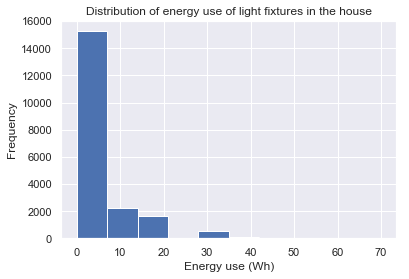

In [7]:
#Data visualization of the dataset 
plt.hist(list_lights, bins=10)
plt.title("Distribution of energy use of light fixtures in the house")
plt.xlabel("Energy use (Wh)")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

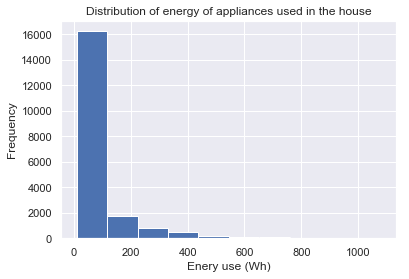

In [8]:
plt.hist(list_appliances, bins = 10)
plt.title("Distribution of energy of appliances used in the house")
plt.xlabel("Enery use (Wh)")
plt.ylabel("Frequency")

**Appendix D: Compute Pearson's correlation coefficient**

In [9]:
#Function to calculate the pearson's correlation value for parameters 
def pcorr(x, y):
    print("The pearson's r value comparing", x , "to", y , "is:")
    print(energydata_df[x].corr(energydata_df[y]))
    print("")

pcorr('appliances', 'lights')

The pearson's r value comparing appliances to lights is:
0.1972775602062427



**Appendix E: Assess the statistical significance of the slope of the regression equation and Compute coefficient of determination**

R-squared =  0.039
Regression equation: appliances =  2.549 * lights +  88.005
                            OLS Regression Results                            
Dep. Variable:             appliances   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     799.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          2.31e-172
Time:                        08:00:31   Log-Likelihood:            -1.1899e+05
No. Observations:               19735   AIC:                         2.380e+05
Df Residuals:                   19733   BIC:                         2.380e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

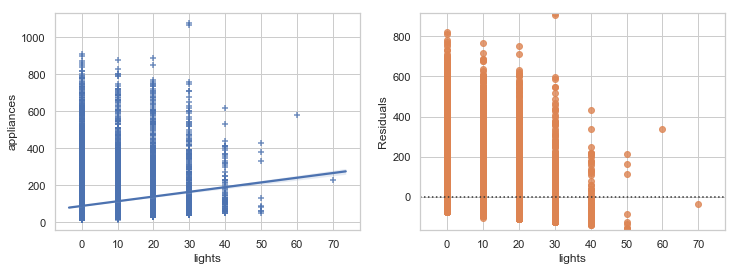

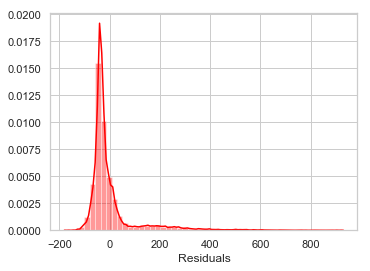

In [11]:
def regression_model(column_x, column_y):
    #this function uses built in library functions to create a scatter plot,
    #plots of the residuals, compute R-squared, and display the regression equation

    #fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(energydata_df[column_x])
    Y = energydata_df[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    #extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    #make plots:
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=energydata_df, marker="+", ax=ax1) #scatter plot
    sns.residplot(x=column_x, y=column_y, data=energydata_df, ax=ax2) #residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure(figsize=(5.5,4)) #histogram
    sns.distplot(regressionmodel.resid, kde=True, axlabel='Residuals', color='red') #histogram

    #print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)
    print(regressionmodel.summary())
    
regression_model('lights', 'appliances')